In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("tracker_output.csv", names = ["x", "y", "t", "id"])
df["ny"] = -df.y

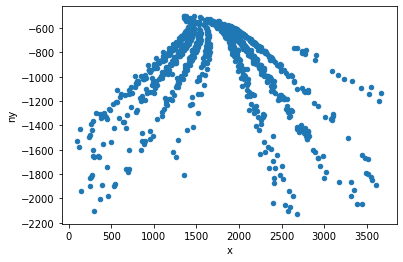

In [65]:
df.plot(x = "x", y = "ny", kind = "scatter")

### Interpolate points

#### Add a column to indicate the point was detected

In [66]:
df['status'] = 'detected'

In [67]:
for i_d in df.id.unique():
    recorded_times = df.loc[df['id']==i_d].t.values
    for i in range(min(recorded_times)+1,max(recorded_times)):
        if i not in recorded_times:
            df = df.append({'t':i, 'id':i_d, 'status':'not_detected'}, ignore_index=True)
        

In [68]:
df = df.sort_values(by=['id','t'])
df = df.interpolate(method ='linear', limit_direction ='forward')

           x           y   t  id          ny        status
0     2278.0  786.000000   5   0 -786.000000      detected
1     2220.0  746.000000   6   0 -746.000000      detected
2     2171.0  715.000000   7   0 -715.000000      detected
3     2125.0  690.000000   8   0 -690.000000      detected
4     2085.0  669.000000   9   0 -669.000000      detected
5     2049.0  650.000000  10   0 -650.000000      detected
6     2018.0  638.000000  11   0 -638.000000      detected
7     1991.0  623.000000  12   0 -623.000000      detected
1175  2009.0  658.666667  13   0 -658.666667  not_detected
1176  2027.0  694.333333  14   0 -694.333333  not_detected
8     2045.0  730.000000  15   0 -730.000000      detected
9     2013.0  704.000000  16   0 -704.000000      detected
1177  1987.5  684.500000  17   0 -684.500000  not_detected
10    1962.0  665.000000  18   0 -665.000000      detected
11    2144.0  780.000000   5   1 -780.000000      detected
12    2093.0  773.000000   5   2 -773.000000      detect

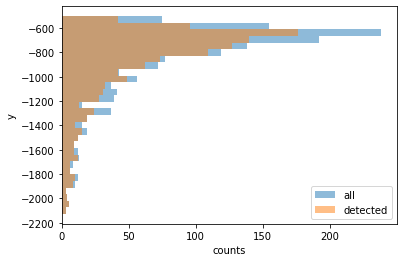

In [115]:
plt.hist(df['ny'], bins=30, orientation='horizontal', alpha=0.5, label='all')
plt.hist(df[df['status']=='detected']['ny'], bins=30, orientation='horizontal', alpha=0.5, label='detected')
plt.xlabel('counts')
plt.ylabel('y')
plt.legend()

In [105]:
detected, bins = np.histogram(df[df['status']=='detected']['ny'], bins=20)
all_, _ = np.histogram(df['ny'], bins=20)

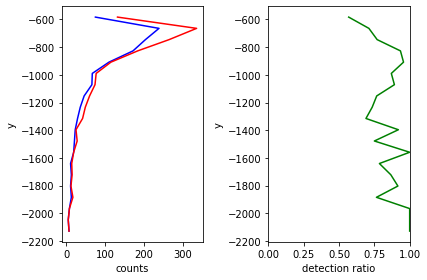

In [107]:
ax1 = plt.subplot(1, 2, 1)
ax1.plot(detected, bins[:-1], color='b')
ax1.plot(all_, bins[:-1], color='r')
ax1.set_xlabel('counts')
ax1.set_ylabel('y')

ax2 = plt.subplot(1,2,2)
ax2.plot(detected/all_, bins[:-1], color='g')
ax2.set_xlabel('detection ratio')
ax2.set_ylabel('y')
ax2.set_xlim(0,1)
plt.tight_layout()
plt.show()